KNN Classification

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import zero_one_loss

In [67]:
data=np.loadtxt('data_banknote_authentication.txt',delimiter=',') # data shape= 1372*5
                                                                  
#1. variance of Wavelet Transformed image (continuous) 
#2. skewness of Wavelet Transformed image (continuous) 
#3. curtosis of Wavelet Transformed image (continuous) 
#4. entropy of image (continuous) 
#5. class (integer) 



In [68]:
# Rearrange the data to get feature data
classification=data[:,4]
zero_index=np.array(np.where(classification==0))[0]
one_index=np.array(np.where(classification==1))[0]
zero_=data[zero_index,:]
one_=data[one_index,:]
zero_data=zero_[:,0:4]
one_data=one_[:,0:4]


variance_zero=zero_[:,0]
variance_one=one_[:,0]


skewness_zero=zero_[:,1]
skewness_one=one_[:,1]

curtosis_zero=zero_[:,2]
curtosis_one=one_[:,2]


entropy_zero=zero_[:,3]
entropy_one=one_[:,3]


bi)


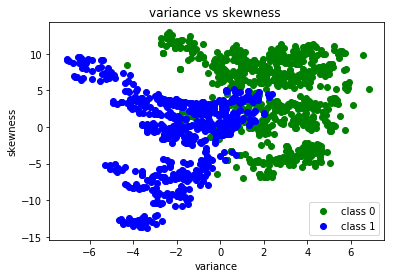

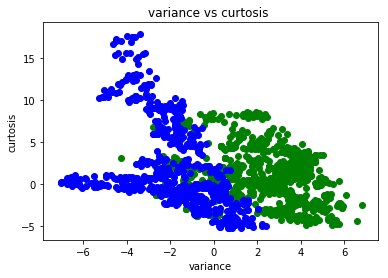

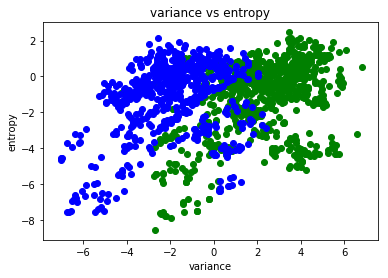

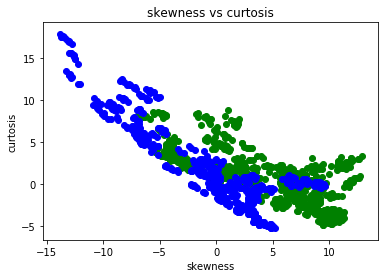

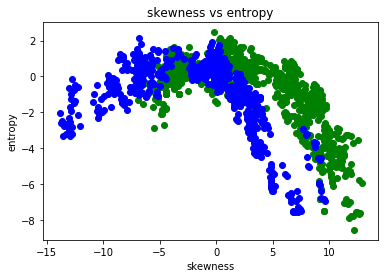

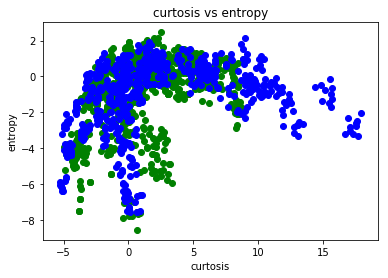

In [69]:
print('bi)')
plt.figure(1)
plt.scatter(variance_zero, skewness_zero, c='g' )
plt.scatter(variance_one, skewness_one, c='b' )
plt.xlabel("variance")
plt.ylabel("skewness")
plt.legend(['class 0','class 1'])
plt.title("variance vs skewness ")


plt.figure(2)
plt.scatter(variance_zero, curtosis_zero, c='g' )
plt.scatter(variance_one, curtosis_one, c='b' )
plt.xlabel("variance")
plt.ylabel("curtosis")
plt.title("variance vs curtosis ")


plt.figure(3)
plt.scatter(variance_zero, entropy_zero, c='g' )
plt.scatter(variance_one, entropy_one, c='b' )
plt.xlabel("variance")
plt.ylabel("entropy")
plt.title("variance vs entropy")


plt.figure(4)
plt.scatter(skewness_zero, curtosis_zero, c='g' )
plt.scatter(skewness_one, curtosis_one, c='b' )
plt.xlabel("skewness")
plt.ylabel("curtosis")
plt.title("skewness vs curtosis")


plt.figure(5)
plt.scatter(skewness_zero,  entropy_zero, c='g' )
plt.scatter(skewness_one,  entropy_one, c='b' )
plt.xlabel("skewness")
plt.ylabel("entropy")
plt.title("skewness vs entropy")


plt.figure(6)
plt.scatter(curtosis_zero, entropy_zero, c='g' )
plt.scatter(curtosis_one, entropy_one, c='b' )
plt.xlabel("curtosis")
plt.ylabel("entropy")
plt.title("curtosis vs entropy")

plt.show()

bii)


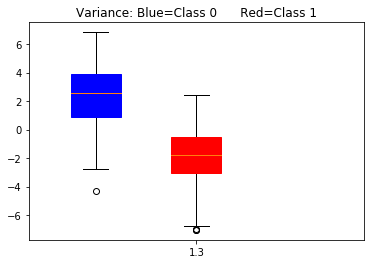

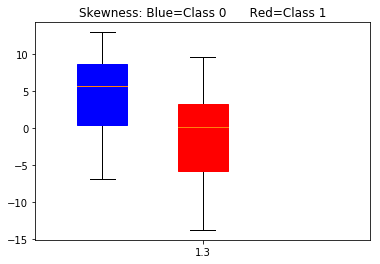

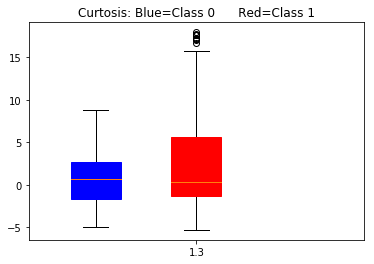

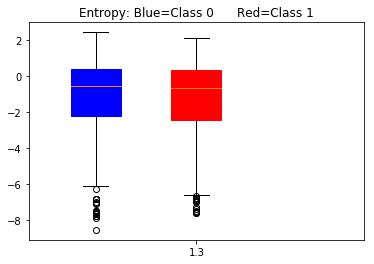

In [70]:
# Plot boxplot

print('bii)')
c0='blue'
c1='red'

plt.figure(1)
plt.boxplot(variance_zero, positions=[1], patch_artist=True,
            boxprops=dict(facecolor=c0, color=c0),          
           )
plt.boxplot(variance_one, positions=[1.3], patch_artist=True,
            boxprops=dict(facecolor=c1, color=c1),          
            )
plt.title('Variance: Blue=Class 0      Red=Class 1')



plt.figure(2)
plt.boxplot(skewness_zero, positions=[1], patch_artist=True,
            boxprops=dict(facecolor=c0, color=c0),          
           )
plt.boxplot(skewness_one, positions=[1.3], patch_artist=True,
            boxprops=dict(facecolor=c1, color=c1),          
            )
plt.title('Skewness: Blue=Class 0      Red=Class 1')




plt.figure(3)
plt.boxplot(curtosis_zero, positions=[1], patch_artist=True,
            boxprops=dict(facecolor=c0, color=c0),          
           )
plt.boxplot(curtosis_one, positions=[1.3], patch_artist=True,
            boxprops=dict(facecolor=c1, color=c1),          
            )
plt.title('Curtosis: Blue=Class 0      Red=Class 1')





plt.figure(4)
plt.boxplot(entropy_zero, positions=[1], patch_artist=True,
            boxprops=dict(facecolor=c0, color=c0),          
           )
plt.boxplot(entropy_one, positions=[1.3], patch_artist=True,
            boxprops=dict(facecolor=c1, color=c1),          
            )
plt.title('Entropy: Blue=Class 0      Red=Class 1')







plt.show()

In [71]:
# biii) 

# Split dataset into training set and test set
test_zero=zero_[:200,:]
test_one=one_[:200,:]
test_total=np.concatenate((test_zero,test_one),axis=0)
#np.random.shuffle(test_total)



train_zero=zero_[200:,:]
train_one=one_[200:,:]
train_total=np.concatenate((train_zero,train_one),axis=0)
#np.random.shuffle(train_total)

In [72]:
# This function helps to select a subset of the training set
def get_data(data,training_num):
    N=int(training_num/2)
    classification=data[:,4]
    zero_index=np.array(np.where(classification==0))[0]
    one_index=np.array(np.where(classification==1))[0]
    zero_=data[zero_index,:]  # data with label
    one_=data[one_index,:]
    
    test_zero=zero_[:200,:]
    test_one=one_[:200,:]
    test_total=np.concatenate((test_zero,test_one),axis=0)
    
    train_zero=zero_[200:,:]
    train_one=one_[200:,:]
    train_total=np.concatenate((train_zero,train_one),axis=0)
    
    new_training=np.concatenate((train_zero[:N,:],train_one[:N,:]),axis=0)
    return (new_training)
    

In [73]:
# This function calculates the rates required

def find_rates(predict,label):
    TP=0
    FP=0
    TN=0
    FN=0

    for i in range(len(label)): 
        if predict[i]==label[i]==1:
           TP=TP+1
        if predict[i]==1 and label[i]==0:
           FP += 1
        if predict[i]==label[i]==0:
           TN += 1
        if predict[i]==0 and label[i]==1:
           FN += 1
    TPR=TP/len(np.where(label==1)[0])
    #print(len(np.where(label==1)))
    FPR=FP/len(np.where(label==1)[0])
    TNR=TN/len(np.where(label==0)[0])
    FNR=FN/len(np.where(label==0)[0])
    precision=TP/(TP+FP)
    recall=TP/(TP+FN)
    fscore=2*precision*recall/(precision+recall)
    rates={
            'TP':TP,
            'FP':FP,
            'TN':TN,
            'FN':FN,

            'TPR':TPR,
            'FPR':FPR,
            'TNR':TNR,
            'FNR':FNR,
            
            'Precision':precision,
            'Recall':recall,
            'FScore': fscore
            }
    return(rates)

In [74]:
# ci)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import zero_one_loss

K=np.array(range(1,904,3))
training_error=np.zeros(len(K))
test_error=np.zeros(len(K))

# Calculate training error
for i in range(len(K)):
    #print(K[i])
    
    #knn.fit(train_total[:,:4], train_total[:,4]) 
    knn=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
               metric_params=None, n_jobs=1, n_neighbors=K[i], p=2,    # minkowski with p=2 is equivalent to standard Euclidean metric
               weights='uniform')
    knn.fit(train_total[:,:4], train_total[:,4])
    predict_train=knn.predict(train_total[:,:4])
    predict_test=knn.predict(test_total[:,:4])
    #print(predict.shape)
    #print(test_total[:,4].shape)
    training_error[i]=zero_one_loss(train_total[:,4], predict_train)
    test_error[i]=zero_one_loss(test_total[:,4], predict_test)    
    


cii)


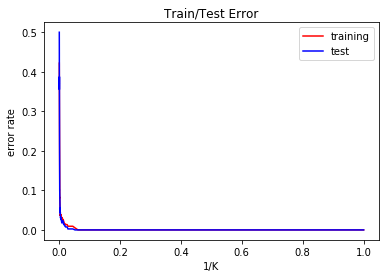

In [75]:
# Plot error rate

print('cii)')
plt.plot(1/K,training_error,color='red')
plt.xlabel('1/K')
plt.ylabel('error rate')
plt.title('Train/Test Error')

#plt.figure(2)
plt.plot(1/K,test_error,color='blue')
plt.legend(['training','test'])
plt.show()

We can see that when K=1, best error rate can be obtained

In [76]:
# K=1 gives the lowest error rate
best_K=1
knn=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
               metric_params=None, n_jobs=1, n_neighbors=best_K, p=2,
               weights='uniform')
knn.fit(train_total[:,:4], train_total[:,4])
predict_train= knn.predict(train_total[:,:4])
predict_test = knn.predict(test_total[:,:4])

train_rate=find_rates(predict_train,train_total[:,4])
test_rate=find_rates(predict_test,test_total[:,4])

In [77]:
# Plot the confusion matrix, true positive rate, true negative rate, precision, and F-score when k = 1.

import pandas as pd
confusion_matrix_test = {'Labelled as 1':[test_rate['TP'],test_rate['FN']],'Labelled as 0':[test_rate['FP'],test_rate['TP']]}
df_test = pd.DataFrame(confusion_matrix_test, index=['Predicted as 1','Predicted as 0'])
print ('Confusion Matrix (Test,K=1)')
print(df_test,'\n')
print('True Positive Rate=',test_rate['TPR'])
print('True Negative Rate=',test_rate['TNR'])
print('Precision=',test_rate['Precision'])
print('F Score=',test_rate['FScore'],'\n','\n')


confusion_matrix_train = {'Labelled as 1':[train_rate['TP'],train_rate['FN']],'Labelled as 0':[train_rate['FP'],train_rate['TP']]}
df_train = pd.DataFrame(confusion_matrix_train, index=['Predicted as 1','Predicted as 0'])
print ('Confusion Matrix (Train,K=1)')
print(df_train,'\n')
print('True Positive Rate=',train_rate['TPR'])
print('True Negative Rate=',train_rate['TNR'])
print('Precision=',train_rate['Precision'])
print('F Score=',train_rate['FScore'],'\n','\n')


Confusion Matrix (Test,K=1)
                Labelled as 0  Labelled as 1
Predicted as 1              0            200
Predicted as 0            200              0 

True Positive Rate= 1.0
True Negative Rate= 1.0
Precision= 1.0
F Score= 1.0 
 

Confusion Matrix (Train,K=1)
                Labelled as 0  Labelled as 1
Predicted as 1              0            410
Predicted as 0            410              0 

True Positive Rate= 1.0
True Negative Rate= 1.0
Precision= 1.0
F Score= 1.0 
 



In [78]:
def find_error(K,training,test,metrics,P,extra_params,algo,weight):
    #K=[s for s in k if s<=len(training)]
    #print('K=',K)
    #print('train num=',len(training))
    #print('test num=',len(test))
    error=np.zeros(len(K))
    for i in range(len(K)):               
        knn=KNeighborsClassifier(algorithm=algo, leaf_size=30, metric=metrics,
                   metric_params=extra_params, n_jobs=1, n_neighbors=K[i],p=P,  # minkowski with p=2 is equivalent to standard Euclidean metric
                   weights=weight)
        knn.fit(training[:,:4], training[:,4])
        predict=knn.predict(test[:,:4])
        #predict_test=knn.predict(test_total[:,:4])
        #print(predict.shape)
        #print(test_total[:,4].shape)
        error[i]=zero_one_loss(test[:,4],predict)
    min_index=np.argmin(error)
    best_k=K[min_index]
    return (error,best_k)
    

In [79]:
# Plot learning curve
def knn_learning_curve(data,test_total):
    N=np.array(range(50,850,50))
    min_error=np.array([])
    for n in N:     
        K=np.array(range(1,n,40))
        training=get_data(data,n)
        error, best_k=find_error(K,training,test_total,'euclidean',P=None,extra_params=None,algo='auto',weight='uniform')
        min_index=np.argmin(error)
        min_error=np.append(min_error,error[min_index])
    
    #print(min_error)
    #plt.plot(N,min_error)
    #plt.xlabel('N')
    #plt.ylabel('error rate')
    #plt.title('Best Error Rate')
    #plt.show()
    return (min_error)
                  

ciii)


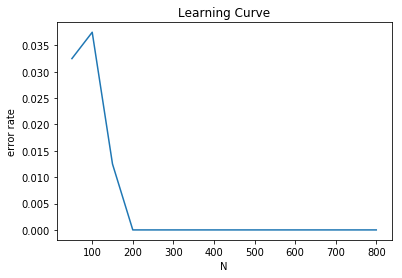

In [80]:
data=np.loadtxt('data_banknote_authentication.txt',delimiter=',') # data shape= 1372*5
N=np.array(range(50,850,50))
error=knn_learning_curve(data,test_total)
print('ciii)')
plt.plot(N,error)
plt.xlabel('N')
plt.ylabel('error rate')
plt.title('Learning Curve')
plt.show()

It is seen that when N >=200, best error rate=0 can be obtained. 

In [81]:
# Minkowski Distance:

K=np.array(range(1,911,10))
training_error=np.zeros(len(K))
test_error=np.zeros(len(K))

manhattan_error,best_k_manhattan=find_error(K,train_total,test_total,'manhattan',
                                            P=None,extra_params=None,algo='auto',weight='uniform')
manhattan_error=min(manhattan_error)

# log P 
P_list=10**((np.arange(1,11))/10)
logP_error_list=np.array([])
for i in range(len(P_list)):
    logP_error,best_k_logP=find_error(np.array([best_k_manhattan,best_k_manhattan]),train_total,test_total,
                                      'minkowski',P=P_list[i],extra_params=None,algo='auto',weight='uniform')
    logP_error=logP_error[0]
    logP_error_list=np.append(logP_error_list,logP_error)
best_logP_error=min(logP_error_list)
best_P=P_list[np.argmin(logP_error_list)]
logP_error,best_k_logP=find_error(np.array([best_k_manhattan,best_k_manhattan]),train_total,test_total,
                                      'minkowski',P=best_P,extra_params=None,algo='auto',weight='uniform')



# Chebyshev Distance
chebyshev_error,best_k_chebyshev=find_error(K,train_total,test_total,'chebyshev',
                                            P=None,extra_params=None,algo='auto',weight='uniform')
chebyshev_error=min(chebyshev_error)

# Mahalanobis Distance
V=np.cov(train_total[:,:4].T)
mahalanobis_error,best_k_mahalanobis=find_error(K,train_total,test_total,'mahalanobis',
                                                P=None,extra_params={'V': V},algo='brute',weight='uniform')
mahalanobis_error=min(mahalanobis_error)




In [82]:
import math
table1 = {'Best Test Error':[manhattan_error,best_logP_error,chebyshev_error,mahalanobis_error],
          'Best K':[best_k_manhattan,best_k_logP,best_k_chebyshev,best_k_mahalanobis]}
df_table1 = pd.DataFrame(table1, index=['Minkowski Distance P=1','Minkowski Distance LogP= 0.1...1 ',
                                      'Chebyshev Distance','Mahalanobis Distance'])
print('d)')
print(df_table1,'\n')
print('Best log10 P=',math.log10(best_P))

d)
                                   Best K  Best Test Error
Minkowski Distance P=1                  1              0.0
Minkowski Distance LogP= 0.1...1        1              0.0
Chebyshev Distance                      1              0.0
Mahalanobis Distance                    1              0.0 

Best log10 P= 0.10000000000000002


In [83]:
# Using weighted voting for Euclidean, Manhattan, and Chebyshev distances

K=np.array(range(1,911,10))
training_error=np.zeros(len(K))
test_error=np.zeros(len(K))

manhattan_error_w,best_k_manhattan_w=find_error(K,train_total,test_total,'manhattan',
                                            P=None,extra_params=None,algo='auto',weight='distance')
manhattan_error_w=min(manhattan_error_w)


chebyshev_error_w,best_k_chebyshev_w=find_error(K,train_total,test_total,'chebyshev',
                                            P=None,extra_params=None,algo='auto',weight='distance')
chebyshev_error_w=min(chebyshev_error_w)


euclidean_error_w,best_k_euclidean_w=find_error(K,train_total,test_total,'euclidean',
                                            P=None,extra_params=None,algo='auto',weight='distance')
euclidean_error_w=min(euclidean_error_w)



In [84]:
table2 = {'Best Test Error':[manhattan_error_w,chebyshev_error_w,euclidean_error_w],
          'Best K':[best_k_manhattan_w,best_k_chebyshev_w,best_k_euclidean_w]}
df_table2 = pd.DataFrame(table2, index=['Manhattan Distance','Chebyshev Distance',
                                      'Euclidean Distance'])
print('e)')
print(df_table2,'\n')


e)
                    Best K  Best Test Error
Manhattan Distance       1              0.0
Chebyshev Distance       1              0.0
Euclidean Distance       1              0.0 



f) The lowest training error obtained is 0. 